<a href="https://colab.research.google.com/github/NataliaGaravito/sistema-motor-generador-aplicado-a-Hardware-In-the-Loop-con-Machine-Learning/blob/main/ANN_prediccion_corriente_motor_pololu_sensor_virtual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving pi.xls to pi.xls


In [ ]:
import pandas as pd
import numpy as np
from numpy import  delete
import sklearn
from sklearn import  preprocessing
from sklearn.utils import shuffle
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt
from sklearn.metrics import  mean_squared_error

In [ ]:
xls=pd.ExcelFile('pi.xls') #llamar archivo
#print(xls.sheet_names)   #mirar nombre de las hojas de calculo
datos=xls.parse('Hoja1')#back up de datos originales 
df=pd.DataFrame(datos)#para preprocesamiento de datos 
print (df)
#print(df.head(1500))

       PWM1   PWM2   EN1M   EN1G   EN2M  ...  I1G2  I1G3  I2G1  I2G2  I2G3
0        37     79      0      0      0  ...  60.9  60.7  74.4  59.2  16.4
1        37     79      0      0      0  ...  56.0  60.9  59.0  74.4  59.2
2        37     79      0      0      0  ...  54.7  56.0  67.8  59.0  74.4
3        37     79      0      0      0  ...  50.5  54.7  62.6  67.8  59.0
4        37     79      0      0      0  ...  54.0  50.5  68.4  62.6  67.8
...     ...    ...    ...    ...    ...  ...   ...   ...   ...   ...   ...
17992   194    242    436    432    152  ...  -0.8  -1.0  -0.4  -0.3  -0.2
17993   194    242    436    432    152  ...  -0.7  -0.8 -16.3  -0.4  -0.3
17994   194    242    436    432    152  ...  -0.8  -0.7  -0.1 -16.3  -0.4
17995   194    242    436    432    152  ...  -0.8  -0.8  -0.2  -0.1 -16.3
17996   194    242    452    452    148  ...  -0.8  -0.8  -0.5  -0.2  -0.1

[17997 rows x 22 columns]


In [ ]:
max=pd.Series.max(df)
print(max)
min=pd.Series.min(df)
print(min)

In [ ]:
scaler = preprocessing.MinMaxScaler()
dfn = scaler.fit_transform(df) 
df=pd.DataFrame(dfn)#convertir "tabla" otra vez
df.columns=['PWM1', 'PWM2', 'EN1M', 'EN1G', 'EN2M', 'EN2G', 'I1M', 'I1G', 'I2M', 'I2G', 'V1M', 'V1G', 'V2M', 'V2G', 'RES1', 'RES2', 'I1G1', 'I1G2', 'I1G3', 'I2G1', 'I2G2', 'I2G3'] #asignar nombre columnas


In [ ]:
#descargar archivos normalizados
df.to_excel('Libro2.xlsx',index=False)

In [ ]:
#eliminacion de columnas que no usamos 
del df['PWM2']
del df['EN2M']
del df['EN2G']
del df['I2M']
del df['I2G']
del df['V2M']
del df['V2G']
del df['RES2']
del df['I2G1']
del df['I2G2']
del df['I2G3']
print (df)

           PWM1      EN1M      EN1G  ...      I1G1      I1G2      I1G3
0      0.031674  0.000000  0.000000  ...  0.088140  0.095678  0.095370
1      0.031674  0.000000  0.000000  ...  0.086141  0.088140  0.095678
2      0.031674  0.000000  0.000000  ...  0.079680  0.086141  0.088140
3      0.031674  0.000000  0.000000  ...  0.085064  0.079680  0.086141
4      0.031674  0.000000  0.000000  ...  0.084449  0.085064  0.079680
...         ...       ...       ...  ...       ...       ...       ...
17992  0.742081  0.344664  0.341502  ...  0.000923  0.000769  0.000461
17993  0.742081  0.344664  0.341502  ...  0.000769  0.000923  0.000769
17994  0.742081  0.344664  0.341502  ...  0.000769  0.000769  0.000923
17995  0.742081  0.344664  0.341502  ...  0.000769  0.000769  0.000769
17996  0.742081  0.357312  0.357312  ...  0.000461  0.000769  0.000769

[17997 rows x 11 columns]


# **eliminacion de outliers**

grafica cajas y bigotes

In [ ]:
df.boxplot(return_type='dict') #grafica de cajas y bigotes (outliers)
plt.show()

metodo 3 sigma/eliminacion de filas

In [ ]:
print(len(df))
for i in range(11):#numero de columnas
  dk=np.array(df)
  coms=dk[:,i]>((np.mean(dk[:,i]))+(3*(np.std(dk[:,i]))))#formula para sigma 3 valores superiores
  comi=dk[:,i]<((np.mean(dk[:,i]))-(3*(np.std(dk[:,i]))))#formula para sigma 3 valores inferiores
  df.drop(df.index[coms|comi], inplace=True)#eliminar valores fuera de sigma
print(df)

17997
           PWM1      EN1M      EN1G  ...      I1G1      I1G2      I1G3
0      0.031674  0.000000  0.000000  ...  0.088140  0.095678  0.095370
1      0.031674  0.000000  0.000000  ...  0.086141  0.088140  0.095678
2      0.031674  0.000000  0.000000  ...  0.079680  0.086141  0.088140
3      0.031674  0.000000  0.000000  ...  0.085064  0.079680  0.086141
4      0.031674  0.000000  0.000000  ...  0.084449  0.085064  0.079680
...         ...       ...       ...  ...       ...       ...       ...
17992  0.742081  0.344664  0.341502  ...  0.000923  0.000769  0.000461
17993  0.742081  0.344664  0.341502  ...  0.000769  0.000923  0.000769
17994  0.742081  0.344664  0.341502  ...  0.000769  0.000769  0.000923
17995  0.742081  0.344664  0.341502  ...  0.000769  0.000769  0.000769
17996  0.742081  0.357312  0.357312  ...  0.000461  0.000769  0.000769

[17961 rows x 11 columns]


eliminacion de columnas

In [ ]:
#correlacion entre columnas
df.corr(method='pearson')

In [ ]:
#eliminacion de columnas con poca correlacion con respecto a la salida
#del df['V1M']
#del df['RES1']
#del df[]

In [ ]:
#dividir datos de entradas y salidas 
X=np.array(df.drop(['I1G'],axis=1))#entradas/se eliminan las salidas 
Y=np.array(df.drop(['PWM1', 'EN1M', 'EN1G', 'I1M', 'V1M', 'V1G', 'RES1', 'I1G1', 'I1G2', 'I1G3'],axis=1))#salidas/se eliminan las entradas

print (len(X))
print (len(Y))
#print('---------------')
#print (Y)

#dividir datos de entrenamiento y de prueba
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3)

#entrenamiento de la red neuronal
rgr=MLPRegressor(solver='lbfgs', alpha=0.1,activation='logistic', 
                 hidden_layer_sizes=(6),  
                 learning_rate='invscaling', max_iter=500)                    
#invscaling          adaptive        random_state=1,
rgr.fit(x_train, y_train) 
rgr.get_params()

17961
17961


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'activation': 'logistic',
 'alpha': 0.1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 6,
 'learning_rate': 'invscaling',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
mp=[coef.shape for coef in rgr.coefs_] #matrices de peso de los parametros del modelo
res=rgr.predict(x_test) #resultado de la prediccion
sco=rgr.score(x_test,y_test) # puntuacion de exactitud del resultado de la prediccion
error=mean_squared_error(res, y_test, squared=False)#MSE=>squared=True / RMSE=>squares=False

peso=rgr.coefs_ #matriz peso de las neuronas
inpeso=rgr.intercepts_ #vector peso de neurona vacia

print ('matrices ', mp,'\n')
#print('resultado prediccion ', res,'\n')
print('coeficiente prediccion ', sco,'\n')
print('peso coeficientes ', peso,'\n')
print('peso neurona vacia ', inpeso,'\n')
print('error', error,'\n')

matrices  [(10, 6), (6, 1)] 

coeficiente prediccion  0.9606264216237327 

peso coeficientes  [array([[ 0.10433859,  0.07615146,  0.30752148, -0.37842551, -0.28603359,
         0.26281427],
       [ 0.02611759, -0.0442557 ,  0.27074476,  0.21024687,  0.34993859,
        -0.24395077],
       [ 0.21613436, -0.17935778, -0.01416489,  0.05304785, -0.11315   ,
         0.03063525],
       [-0.20926019,  0.16096659,  0.06224134,  0.08137274, -0.14171729,
         0.37267934],
       [ 0.26710852,  0.05678658, -0.22075162, -0.1269945 ,  0.15589049,
        -0.19908153],
       [-0.32469995,  0.18027679,  0.07767284,  0.46223136, -0.23437649,
        -0.26049152],
       [ 0.07638786, -0.01203665,  0.18285504,  0.38721025, -0.11642481,
         0.36318586],
       [-0.27976162, -0.0887764 ,  0.85897466, -0.71028213,  0.17607334,
         0.46972637],
       [ 0.31047586, -0.43326161,  0.2170249 , -0.25924324,  0.3417878 ,
         0.45916226],
       [ 0.02029994, -0.68222511,  0.41072451, -0.

[0.00244095 0.25946402 0.5185868  ... 0.53341294 0.63090897 0.31325188]


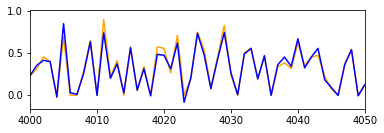

In [ ]:
#grafica de aprendizaje (x= # iteraciones, y= error)
plt.figure()
plt.subplot(211)
plt.plot(y_test, color='orange')
plt.xlim(4000,4050)
plt.plot(res, color='blue')
print(res)